<a href="https://colab.research.google.com/github/AnandDaksh/Crop-Disease-Classification/blob/main/(Inception)_Potato_Plant_Village_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Found 1722 images belonging to 3 classes.
Found 430 images belonging to 3 classes.
Epoch 1/20
54/54 [==============================] - 564s 10s/step - loss: 5.4144 - accuracy: 0.6156 - val_loss: 1.2964 - val_accuracy: 0.7326
Epoch 2/20
54/54 [==============================] - 522s 10s/step - loss: 1.3977 - accuracy: 0.7102 - val_loss: 1.4404 - val_accuracy: 0.5907
Epoch 3/20
54/54 [==============================] - 520s 10s/step - loss: 1.4421 - accuracy: 0.7021 - val_loss: 0.9478 - val_accuracy: 0.7558
Epoch 4/20
54/54 [==============================] - 559s 10s/step - loss: 1.0648 - accuracy: 0.7584 - val_loss: 1.6651 - val_accuracy: 0.6628
Epoch 5/20
54/54 [==============================] - 558s 10s/step - loss: 1.0996 - accuracy: 0.7242 - val_loss: 1.5939 - val_accuracy: 0.5581
Epoch 6/20
54/54 [==============================] - 519s 10s/step - loss: 0.9867 - accuracy: 0.7636 - val_loss: 0.9564 - val_accuracy: 0.6814
Epoch 7/20
54/54 [==============================] - 562s 10s/step

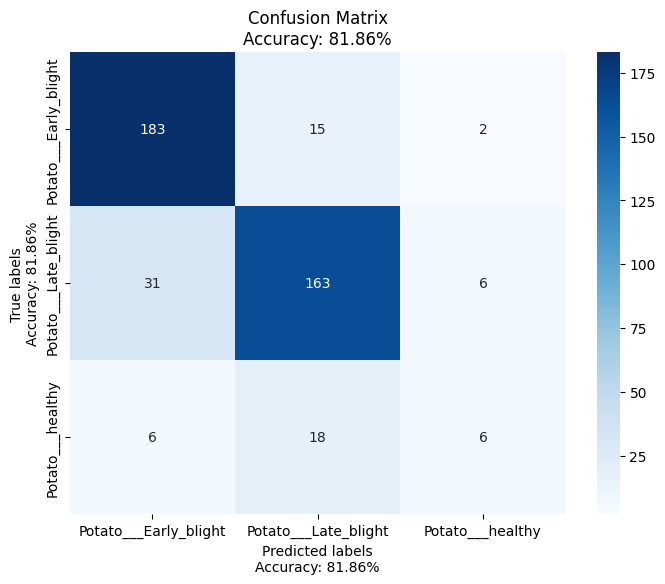

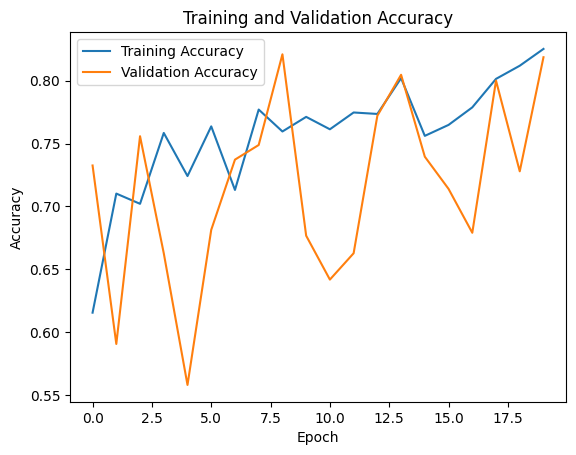

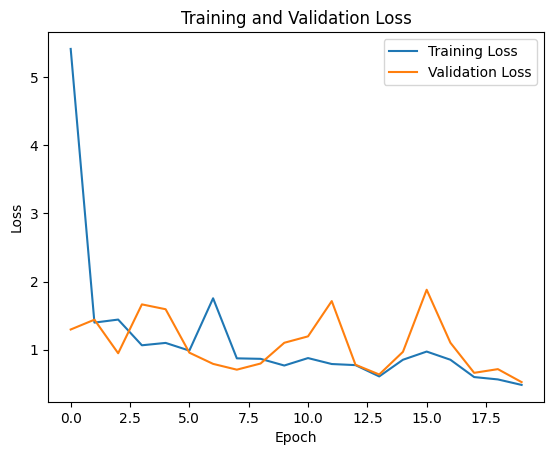

Predicted class name: Potato___Late_blight


In [4]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
from tensorflow.keras.applications import InceptionV3

# Define classes
classes = ["Potato___Early_blight", "Potato___Late_blight", "Potato___healthy"]

# Define the path to the folder containing the images
data_dir = "/content/drive/MyDrive/Plant Village Datasets/Potato"

# Initialize ImageDataGenerator for data augmentation
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    validation_split=0.2  # Splitting the data into training and validation sets
)

# Load and augment the training data
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(299, 299),  # Resizing images to 299x299 to match the input shape of InceptionV3
    batch_size=32,
    class_mode='sparse',  # Since we have sparse categorical labels
    shuffle=True,
    subset='training'  # Specify that this is the training set
)

# Load the test data without augmentation
test_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(299, 299),
    batch_size=16,
    class_mode='sparse',
    shuffle=False,  # No need to shuffle the test data
    subset='validation'  # Specify that this is the validation set
)

# Load the InceptionV3 model with pretrained weights on ImageNet
inception_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Freeze the layers in the InceptionV3 model
for layer in inception_model.layers:
    layer.trainable = False

# Define your custom classification layers without dropout
x = layers.GlobalAveragePooling2D()(inception_model.output)
x = layers.Dense(64, activation='relu')(x)
output = layers.Dense(len(classes), activation='softmax')(x)  # Use len(classes) for number of output classes

# Create the model
inception_model_custom = models.Model(inception_model.input, output)

# Compile the model with Adam optimizer and sparse categorical crossentropy loss
inception_model_custom.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Fit the model
history = inception_model_custom.fit(
    train_generator,
    epochs=20,
    validation_data=test_generator
)

# Evaluate the model
test_loss, test_accuracy = inception_model_custom.evaluate(test_generator)
print("Test Accuracy:", test_accuracy)

# Get the predicted classes for the test data
y_pred = np.argmax(inception_model_custom.predict(test_generator), axis=1)

# Get true labels
y_true = test_generator.classes

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)
accuracy = np.trace(conf_matrix) / np.sum(conf_matrix)
accuracy_percentage = accuracy * 100

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.xlabel(f'Predicted labels\nAccuracy: {accuracy_percentage:.2f}%')
plt.ylabel(f'True labels\nAccuracy: {accuracy_percentage:.2f}%')
plt.title(f'Confusion Matrix\nAccuracy: {accuracy_percentage:.2f}%')
plt.show()

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Get the predicted class name
predicted_class_name = classes[y_pred[3]]
print("Predicted class name:", predicted_class_name)
